In [1]:
import sys
sys.path.append('../SpectralMechanicsAnalysis')
from SpectralMechanicsAnalysis.simulations import simulate_trajectory
from SpectralMechanicsAnalysis.models import G_Maxwell, G_Kelvin_Voigt, G_fractional_Kelvin_Voigt, PSD
#from analyze_data import Laplace_NLL
import matplotlib.pyplot as plt
import numpy as np
from SpectralMechanicsAnalysis.data_handeling import Data
from SpectralMechanicsAnalysis.data_handeling import load_data

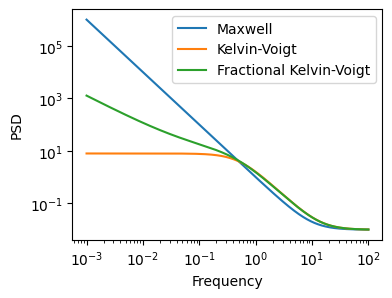

In [2]:
#plot the PSD of the idfferent models
fig, ax = plt.subplots(1,1, figsize=(4,3))
min_freq = 0.001
max_freq = 100
freq = np.logspace(np.log10(min_freq), np.log10(max_freq), 1000)
A = .5
B = 1.
alpha = .1
beta = 1
noise = 0.01
PSD_maxwell = PSD(freq, G_Maxwell, [A, B,noise])
plt.plot(freq, PSD_maxwell, label='Maxwell')
PSD_kv = PSD(freq, G_Kelvin_Voigt, [A, B,noise])
plt.plot(freq, PSD_kv, label='Kelvin-Voigt')
PSD_fkv = PSD(freq, G_fractional_Kelvin_Voigt, [A, B, alpha, beta, noise])
plt.plot(freq, PSD_fkv, label='Fractional Kelvin-Voigt')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('PSD')
plt.show()

In [10]:
simulation_time =int( 1/min_freq)
sampling_steps = int(simulation_time*max_freq*2)

log_weighted = True
unweighted_postfit = True

maxwell_data = Data(*simulate_trajectory(simulation_time,sampling_steps, G_Maxwell, [A, B, noise]), name='Maxwell', log_weighted=log_weighted, unweighted_postfit = unweighted_postfit)
kelvin_voit_data= Data(*simulate_trajectory(simulation_time,sampling_steps, G_Kelvin_Voigt, [A, B, noise]), name='Kelvin-Voigt', log_weighted=log_weighted, unweighted_postfit = unweighted_postfit)
fractional_kelvin_voigt_data=Data(*simulate_trajectory(simulation_time,sampling_steps, G_fractional_Kelvin_Voigt, [A, B, alpha, beta, noise]), name='Fractional Kelvin-Voigt', log_weighted=log_weighted, unweighted_postfit = unweighted_postfit)

Data_list = [maxwell_data, kelvin_voit_data, fractional_kelvin_voigt_data]
label_list = ['Maxwell', 'Kelvin-Voigt', 'Fractional Kelvin-Voigt']

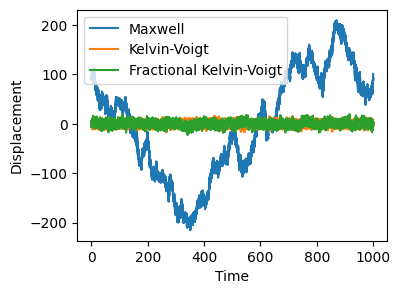

In [11]:
#plot the trajectory    
fig, ax = plt.subplots(1,1, figsize=(4,3))
for data, label in zip(Data_list, label_list):
    plt.plot(data.t, data.x, label=label)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


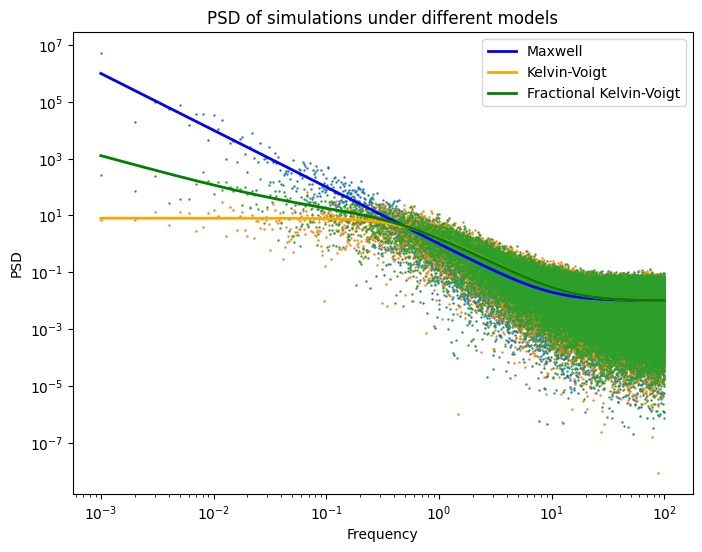

In [12]:
# Plotting and generating PSD for different data in the list
for data in Data_list:
    data.create_PSD()

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the PSD for each dataset without adding them to the legend
for data in Data_list:
    data.plot_psd(ax)

# Now, plot the specific models where you want to show legends
ax.plot(freq, PSD_maxwell, color="blue", linewidth=2, label='Maxwell')
ax.plot(freq, PSD_kv, color="orange", linewidth=2, label='Kelvin-Voigt')
ax.plot(freq, PSD_fkv, color="green", linewidth=2, label='Fractional Kelvin-Voigt')

# Only now, add the legend
ax.legend()

# Set plot characteristics
ax.set_title('PSD of simulations under different models')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency')
ax.set_ylabel('PSD')

# Display the plot
plt.show()


In [13]:
#make all the fits for all the data
for data in Data_list:
    data.create_NLL_maxwell()
    data.create_NLL_kelvin_voigt()
    data.create_NLL_fractional_kelvin_voigt()

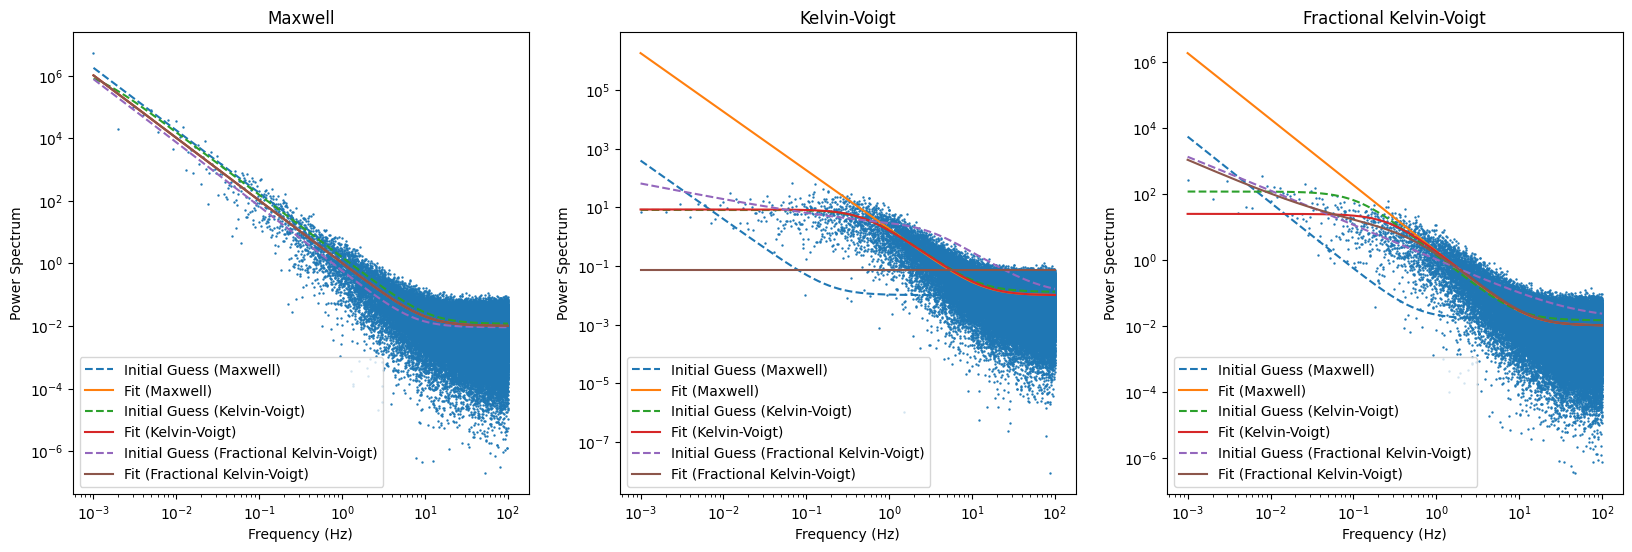

In [14]:
#make one plot for each data in a row. In each plot, plot the data and the fits

fig, ax = plt.subplots(1,3, figsize=(20,6))
data_names = ['Maxwell', 'Kelvin-Voigt', 'Fractional Kelvin-Voigt']
for i, data in enumerate(Data_list):
    #make title
    ax[i].set_title(data_names[i])
    data.plot_psd(ax[i])
    

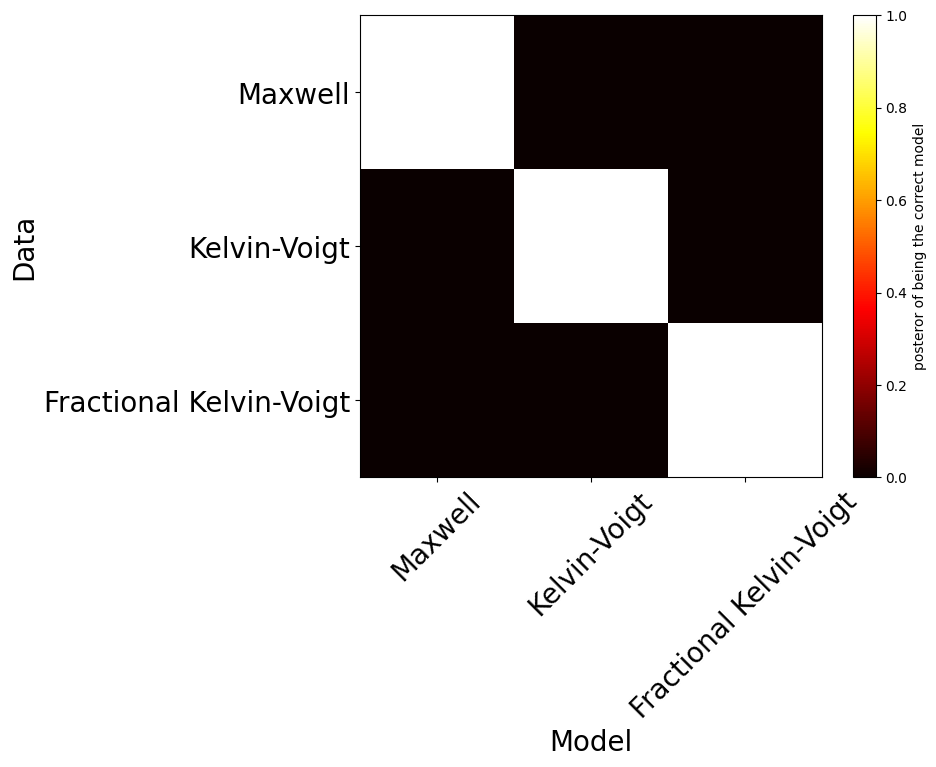

In [15]:
#make a matrix colormap with data on the one axis and models on the other axis. In each cell, plot the NLL of the model for the data
posteror_matrix = np.zeros((len(Data_list),3))
for i, data in enumerate(Data_list):
    data.bayesian_update()
    posteror_matrix[i,0] = data.posterior_maxwell
    posteror_matrix[i,1] = data.posterior_kelvin_voigt
    posteror_matrix[i,2] = data.posterior_fractional_kelvin_voigt

fig, ax = plt.subplots(1,1, figsize=(8,6))
im = ax.imshow(posteror_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(im, ax=ax, label='posteror of being the correct model')
plt.xlabel('Model', fontsize=20)
plt.ylabel('Data', fontsize=20)
plt.xticks([0,1,2], ['Maxwell', 'Kelvin-Voigt', 'Fractional Kelvin-Voigt'], fontsize=20, rotation=45)
plt.yticks([0,1,2], ['Maxwell', 'Kelvin-Voigt', 'Fractional Kelvin-Voigt'], fontsize=20)
plt.show()


In [16]:
# print the fit parameters and the posteror of the models
for data in Data_list:
    print(data.name)
    print('Maxwell:', data.posterior_maxwell)
    print('Kelvin-Voigt:', data.posterior_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.posterior_fractional_kelvin_voigt)
    print('Maxwell:', data.fit_maxwell)
    print('Kelvin-Voigt:', data.fit_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.fit_fractional_kelvin_voigt)
    print('')

Maxwell
Maxwell: 0.9968476485005417
Kelvin-Voigt: 0.0031523199766949964
Fractional Kelvin-Voigt: 3.152276323148993e-08
Maxwell: [0.50527355 1.00092798 0.00992594]
Kelvin-Voigt: [2.43739381e-08 1.97907383e+00 9.92596953e-03]
Fractional Kelvin-Voigt: [1.4543021749855694, 0.524773914534087, 0.9999999999727518, 0.9999997695548579, 0.009925973824567204]

Kelvin-Voigt
Maxwell: 1.72964436969e-312
Kelvin-Voigt: 1.0
Fractional Kelvin-Voigt: 0.0
Maxwell: [0.91584485 1.02079708 0.01006546]
Kelvin-Voigt: [0.48846927 1.00899182 0.0099655 ]
Fractional Kelvin-Voigt: [0.5346896534268546, 2.365179614319212e-15, 3.714431183712897e-18, 1.191512179660515e-16, 0.07404244114926677]

Fractional Kelvin-Voigt
Maxwell: 4.4048647877382306e-222
Kelvin-Voigt: 2.9068154899648894e-42
Fractional Kelvin-Voigt: 1.0
Maxwell: [0.89793024 1.00101611 0.01021415]
Kelvin-Voigt: [0.29546007 1.06203312 0.01015347]
Fractional Kelvin-Voigt: [0.5167572958089589, 1.019791400666557, 0.09080810519338328, 0.9896636401582622, 0.010068

In [17]:
# print the fit parameters and the posteror of the models
for data in Data_list:
    print(data.name)
    print('Maxwell:', data.posterior_maxwell)
    print('Kelvin-Voigt:', data.posterior_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.posterior_fractional_kelvin_voigt)
    print('Maxwell:', data.fit_maxwell)
    print('Kelvin-Voigt:', data.fit_kelvin_voigt)
    print('Fractional Kelvin-Voigt:', data.fit_fractional_kelvin_voigt)
    print('')

Maxwell
Maxwell: 0.9968476485005417
Kelvin-Voigt: 0.0031523199766949964
Fractional Kelvin-Voigt: 3.152276323148993e-08
Maxwell: [0.50527355 1.00092798 0.00992594]
Kelvin-Voigt: [2.43739381e-08 1.97907383e+00 9.92596953e-03]
Fractional Kelvin-Voigt: [1.4543021749855694, 0.524773914534087, 0.9999999999727518, 0.9999997695548579, 0.009925973824567204]

Kelvin-Voigt
Maxwell: 1.72964436969e-312
Kelvin-Voigt: 1.0
Fractional Kelvin-Voigt: 0.0
Maxwell: [0.91584485 1.02079708 0.01006546]
Kelvin-Voigt: [0.48846927 1.00899182 0.0099655 ]
Fractional Kelvin-Voigt: [0.5346896534268546, 2.365179614319212e-15, 3.714431183712897e-18, 1.191512179660515e-16, 0.07404244114926677]

Fractional Kelvin-Voigt
Maxwell: 4.4048647877382306e-222
Kelvin-Voigt: 2.9068154899648894e-42
Fractional Kelvin-Voigt: 1.0
Maxwell: [0.89793024 1.00101611 0.01021415]
Kelvin-Voigt: [0.29546007 1.06203312 0.01015347]
Fractional Kelvin-Voigt: [0.5167572958089589, 1.019791400666557, 0.09080810519338328, 0.9896636401582622, 0.010068

In [28]:
print(f"Maxwell parameter: A = {A}, B = {B}, noise = {noise}")
print(f"fitted Maxwell parameter: A = {maxwell_data.fit_maxwell[0]}, B = {maxwell_data.fit_maxwell[1]}, noise = {maxwell_data.fit_maxwell[2]}")
print(f"Kelvin-Voigt parameter: A = {A}, B = {B}, noise = {noise}")
print(f"fitted Kelvin-Voigt parameter: A = {kelvin_voit_data.fit_kelvin_voigt[0]}, B = {kelvin_voit_data.fit_kelvin_voigt[1]}, noise = {kelvin_voit_data.fit_kelvin_voigt[2]}")
print(f"Fractional Kelvin-Voigt parameter: A = {A}, B = {B}, alpha = {alpha}, beta = {beta}, noise = {noise}")
print(f"fitted Fractional Kelvin-Voigt parameter: A = {fractional_kelvin_voigt_data.fit_fractional_kelvin_voigt[0]}, B = {fractional_kelvin_voigt_data.fit_fractional_kelvin_voigt[1]}, alpha = {fractional_kelvin_voigt_data.fit_fractional_kelvin_voigt[2]}, beta = {fractional_kelvin_voigt_data.fit_fractional_kelvin_voigt[3]}, noise = {fractional_kelvin_voigt_data.fit_fractional_kelvin_voigt[4]}")

Maxwell parameter: A = 0.5, B = 1.0, noise = 0.01
fitted Maxwell parameter: A = 0.4960243112238508, B = 0.9997096521281686, noise = 0.009989271647398107
Kelvin-Voigt parameter: A = 0.5, B = 1.0, noise = 0.01
fitted Kelvin-Voigt parameter: A = 0.4918050862843218, B = 0.9966925339227932, noise = 0.010073539783498665
Fractional Kelvin-Voigt parameter: A = 0.5, B = 1.0, alpha = 0.1, beta = 1, noise = 0.01
fitted Fractional Kelvin-Voigt parameter: A = 1.0040946841621652, B = 0.5384265671311301, alpha = 1.0, beta = 0.10449767163338654, noise = 0.00998077823784939


In [29]:
data_saving_path = "../data/"
for data in Data_list:
    saving_path = data_saving_path + data.name
    data.save(saving_path)

In [30]:
loaded_data = []
for data in Data_list:
    loaded_data.append(load_data(data_saving_path + data.name))